# Jupyter Notebook - Kapitel Drei (Grundlagen der Graphentheorie)
Dieses Jupyter Notebook zeigt, warum Pfadplanung und Pfadfindung essenzielle Fähigkeiten für Roboter und autonome Systeme sind. Es bietet eine Motivation sowie eine grundlegende Einführung in Graphen und stellt verschiedene Algorithmen vor, die auf Graphen arbeiten.

In [8]:
##
# Schritt 0: bitte initialisieren zum Ausführen aller Code Zellen.
##

!pip install -r sources_graph_theory/requirements.txt

## Abschnitt 1 - Die Problemstellung/Motivation

Viele von euch nutzen Algorithmen der Graphentheorie, ohne sich dessen bewusst zu sein. Das beginnt bereits bei einfachen Navigationsanfragen über Google Maps oder andere Navigationsdienste.

**Abb. 1: Lageplan von Görlitz vom Bahnhof bis zur HSZG**

<img src="sources_graph_theory/Lage_Bahnhof_Goerlitz.png" width="100%" align="center">

[Quelle Lageplan](https://www.mapz.com/stadtplan/image/g%C3%B6rlitz_multicolor.png)

## Aufgabe
Das **Ziel** ist es, vom **roten Gebäudekomplex** (dem Bahnhof in Görlitz) zum Campus der **Hochschule Zittau/Görlitz** zu gelangen.
Normalerweise würde man als Reisender bei der Ankunft am Bahnhof das Smartphone nehmen, eine Navigations-App öffnen und das Ziel eingeben.

## Abschnitt 1.1 - Die Standardlösung des Routenproblems
**Abb. 2: Beispiel für einen Routenplaner**

<img src="sources_graph_theory/bahnhof_hszg_route.png" width="500" align="center">

**Die Lösung**

Die Standardlösung des Problems besteht darin, das Ziel zu definieren und bei aktivierter Standortabfrage, kann Startpunkt selbst bestimmt werden. Anschließend werden mögliche Wege/Routen zum Ziel angezeigt, wie oben zu sehen durch die gestrichelte Linie.

### Fragen die sich dem interessierten Leser stellen können
- Wie können Wege, Pfade oder Routen gespeichert werden?
- Was für Möglichkeiten gibt es um einen Pfad von A &rarr; B zu finden?

Weitere Fragen die euch einfallen:
- ...

## Abschnitt 1.2 - Hintergrundwissen zur Graphentheorie

In diesem Abschnitt wird erklärt was ein **Graph** ist und was kein valider Graph ist. Darüber hinaus werden **Datenstrukturen** dargestellt, die genutzt werden können um Graphen im Computer zu speichern.

### Unterabschnitt 1.2.1 - Definition

Als erstes sollte man an dieser Stelle definieren, was ein solcher Graph überhaupt ist. Als erste mus man erwähnen das ein sogenannter Graph eine Darstellung aus **Ecken** und **Kanten** ist. Im englischen werden die Ecken als Vertices bezeichnet und die Kanten als Edges.

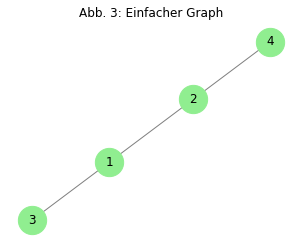

In [2]:
%run sources_graph_theory/section_1_1.py

**Allgemein**

In der obenstehenden Abbildung (Abb.1) sind grüne Punkte dargestellt, diese werden in der Fachsprache auch **Knoten** genannt. Die schwarzen Linien, die Verbindungen zwischen den **Knoten**, werden als **Kanten** bezeichnet. In diesen grünen Punkten stehen die Namen/Bezeichner der einzelnen **Knoten**, diese werden der Einfachkeit wegen als Zahlen representiert. Es wären aber auch die folgenden vier Bezeichnungen möglich:

- 1 &rarr; Löbau
- 2 &rarr; Herrnhut
- 3 &rarr; Zittau
- 4 &rarr; Görlitz

In der Abbildung sind die **Knoten** über die schwarzen Linien verbunden, den sogenannten **Kanten**. Dies zeigt an das es eine Verbindung/Beziehung zwischen den Knoten gibt. Es gibt auch noch einen weiteren Typen von Graphen der eine weitere Eigenschaft modelliert. Im folgenden wird ein gerichteter Graph vorgestellt.

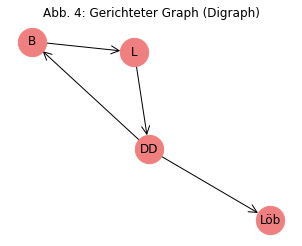

In [3]:
%run sources_graph_theory/section_1_2.py

**Allgemein**

Der Graph aus Abbildung 2 enthält ebenfalls Knoten, nur sind diese dieses mal rot. Die Bezeichnung der **Knoten** erfolgt durch **Zeichenketten**. Die **Kanten** zwischen den Knoten sind nun als **schwarze Pfeile** dargestellt. Das bedeutet es wird abgebildet welcher Knoten mit welchem in Verbindung steht und wie die Laufrichtung ist, d.h. von einem Knoten zu einem anderen geht es nur in Pfeilrichtung.

Um die Darstellung etwas relevanter zu gestalten sind hier die Städte gemeint:

- B &rarr; Berlin
- DD &rarr; Dresden
- Löb &rarr; Löbau
- L &rarr; Leipzig

**Welche Informationen enthält der Graph?**

Von Dresden kommt man etwa nach Berlin, aber nicht umgekehrt. Von Dresden kann man ebenfalls in RIchtung Löbau, aber nicht entgegengesetzt. Von Berlin kann ich über Leipzig wieder nach Dresden.

**Arten von Graphen**

Zusammenfassend kann man Graphen in:

- ungerichtete Graphen (Knoten durch Kanten verbunden)
- gerichtete Graphen (Knoten Kanten verbunden und geben die Richtung vor)

einteilen selbstverständlich gibt noch weitere Unterscheidungen bzw. Typen, siehe hierzu:

- [externer Link: Grundbegriffe 1](https://programmingwiki.de/Grundbegriffe_der_Graphentheorie_1)
- [externer Link: Grundbegriffe 2](https://programmingwiki.de/Grundbegriffe_der_Graphentheorie_2)

**Formale Definition**

Ein Graph $G$ ist ein Paar von Mengen $ G = (E, K)$, 

wobei $E$ für eine beliebige Anzahl von Ecken/Knoten steht und $K$ steht für die Anzahl von Kanten zwischen den Knoten.

**Übungsbeispiel 1**

Wenn man nun den Graphen aus Abbildung 1 beschreiben möchte kann man die Menge der Ecken wie folgt definieren: $ E = \{1;2;3;4\} $ 

Eine Kante lässt sich mit Hilfe zweier Ecken definieren, wie zum Beispiel die Kante zwischen dem **Knoten 1** und dem **Knoten 2** ist dann mit $ (1;2) $ beschrieben.

Bei ungerichteten Graphen ist die Kante zwischen zwei Knoten (wie in Abbildung 1) in beide Richtungen begehbar, hierbei ist die Reihenfolge der Knoten egal, um eine Kante zu definieren. D.h. wenn ich die Kante zwischen dem **Knoten 1** und dem **Knoten 3** definieren will ist $ (1;3) $ eine Lösung und eine weitere Lösung wäre $ (3;1) $. 

Anders ist das bei einem gerichteten Graph, hier ist der Startknoten vorn und der benachbarte Knoten einer Kanten an der zweiten Stelle, die Laufrichtung spielt hierbei eine Rolle. Das heißt in Abbildung 2, kann man die Kante zwischen B und L wie folgt beschreiben $ (B;L) $.

- [externer Link: Definitionen Knoten und Kanten](https://programmingwiki.de/Grundbegriffe_der_Graphentheorie_1)

## Verständnis Quiz Grundlagen - Übungsaufgabe 1

In [4]:
%run sources_graph_theory/quiz_foundations.py

<IPython.core.display.Javascript object>

### Unterabschnitt 1.2.2 - Graphrepräsentation und Speicherung (intuitiv)

Die Grundlage für die folgenden Überlegungen stellt Abbildung 1 (auch Abb. 1) dar. Jedoch gibt es dort noch keine Informationen über Knoten oder Kanten. Um über etwas konkretes zu diskutieren wird ein etwas modifizierter Lageplan angezeigt.

Folgende Informationen wurden hervorgehoben:

- an allen Kreuzungspunkten wurden grüne Knoten eingefügt
- alle sichtbaren Knoten wurden entsprechend numerisch benannt

Die in Abbildung 5 visualisierte Karte dient als Grundlage für die folgenden Übungsaufgaben.

**Abb. 5: Modifizierter Lageplan von Görlitz vom Bahnhof bis zur HSZG einschließlich benannter Knoten**

<img src="sources_graph_theory/map_gr_vertices_marked_numbered.png" width="90%" align="center">

## Aufgaben - Repräsentation und Umgang mit Graphen

- **Übungsaufgabe 2**: Finde einen Weg/Pfad vom Start **Knoten 1** (Bahnhof) zur Hochschule Zittau/Görlitz **Knoten 18**. Notiere dabei alle Knoten auf deinem Weg wie folgt: 1 -> 6 -> 7 ... -> 18. Notiere die Anzahl aller Knoten am Ende.
- **Übungsaufgabe 3**: Findest du einen Weg, der genau neun Knoten besitzt?

Sieh dir die unten stehende Tabelle an, diese Tabelle soll unsere Datengrundlage werden der Tabellenkopf (erste Zeile) bezeichnet die ersten neun Knoten. Die erste Spalte ebenfalls von 1 bis 9 nummerriert bezeichnet ebenfalls die Knoten. In der zweiten Zeile und in der zweiten Spalte steht eine Null (als Zahl 0), das heißt vomm **Knoten 1** bis zum **Knoten 1** beträgt die **Distanz 0 m**. 

**Aufgabenteil-Kanteninformationen**

Anhand von Abbildung 5 und mit Hilfe von einem Geo-Informationssystem wie etwa Google Maps sollst du die folgenden Knoten vervollständigen:

- **Übungsaufgabe 4**: Finde alle Nachbarn und deren Entfernungen von dem **Knoten 1** und trage die Werte in die Tabelle ein. Unten ist eine kleine Vorgehensbeschreibung als Hilfestellung angegeben.    

- **Übungsaufgabe 5**: Finde alle Nachbarn und deren Entfernungen von dem **Knoten 7** und trage die Werte in die Tabelle ein.

**Hilfe-Stellung**:
- **Schritt 1**: Finde alle Nachbarn
- **Schritt 2**: Nutze das Geo-Informationssystem zum finden der Etfernungen
- **Schritt 3**: Trage die ermittelten Entfernungen in die Tabelle ein.

Dazu musst du einfach doppelt auf die Tabelle klicken und dann öffnet sich der Modus zum Editieren. 
Bitte denke daran das du von deinem Startknoten zum Nachbarknotten musst und logischer Weise, ermittelst du somit auch die Entfernung von diesem Nachbar zu deinem aktuellen Startknoten, d.h. zu jeder Distanz muss es zwei Einträge geben. 

**Beispiel**: Von Knoten 1 kann ich zu Knoten 6, das sind xx Meter, gleichzteitig kann ich ja von Knoten 6 auch wieder zurück zu Knoten 1 Laufen, was ebenfalls 6m sind, das ist mit zwei Einträgen gemeint.


|   | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 
|---|---|---|---|---|---|---|---|---|---|
| 1 | **0** | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | 
| 2 | -1 | **0** | -1 | -1 | -1 | -1 | -1 | -1 | -1 |
| 3 | -1 | -1 | **0** | -1 | -1 | -1 | -1 | -1 | -1 |
| 4 | -1 | -1 | -1 | **0** | -1 | -1 | -1 | -1 | -1 |
| 5 | -1 | -1 | -1 | -1 | **0** | -1 | -1 | -1 | -1 |
| 6 | -1 | -1 | -1 | -1 | -1 | **0** | -1 | -1 | -1 |
| 7 | -1 | -1 | -1 | -1 | -1 | -1 | **0** | -1 | -1 |
| 8 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | **0** | -1 |
| 9 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | -1 | **0** |

Tab. 1: Entfernungen aus Abb. 5

<details>
<summary>Hilfestellung für die Nachbarn</summary>
Der Knoten 1 ist mit dem Knoten 6 und dem Knoten 8 direkt benachbart.
    <details>
    <summary>Wie bekomme ich die Entfernung heraus?</summary>
    Um die Entfernung zu messen, muss ich zwei Map-Markierungen setzen, eine am Knotenpunkt Berliner Str. und Bahnhofstr. (Knoten 1) und einen zweiten Kreuzungspunkt zwischen der Jakobstraße und der Bahnhofstraße (Knoten 8). Laut dem Geo-Informations Dienst von Google Maps sind das etwa 190m. Das heißt wir haben die Entfernung von Knoten 1 zu Knoten 8 ermittelt und in der neunten Spalte (d.h. wo im Tabellenkopf 8 steht) bitte in die zweite Zeile und die -1 durch 190 ergänzen. Da wir vorher Meter als Maßeinheit verabredet haben, reicht der Zahlwert aus.
    </details>
</details>

### Unterabschnitt 1.2.3 - Die Adjazenz Matrix

Die Adjazenzmatrix ist eine Matrix die der Tabelle 1 nachempfunden ist. Das Wort **adjazent** heißt benachbart und definiert das Verhältnis zweier Knoten, welche durch eine Kante verbunden sind. Ein weiterer Begriff im Umgang mit Graphen ist **inzident**, dieser Begriff beschreibt das ein Knoten zu einer Kante gehört. Neben der **Adjazenzmatrix** gibt es auch die Adjazenzliste.

- [externer Link: Adjazenzmatrix und Liste](https://programmingwiki.de/Grundbegriffe_der_Graphentheorie_1)
- [externer Link: Adjazenzliste](https://de.wikipedia.org/wiki/Adjazenzliste#:~:text=In%20der%20Graphentheorie%20sind%20Adjazenzlisten,(in%20gerichteten%20Graphen)%20angegeben.)

Die Adjazenzmatrix wird im wesentlichen über ein zwei dimensionales Array implementiert. Die Indizes des Array entsprechen dabei den Knotenbezeichnungen. Die Werte den jeweiligen Entfernungen eines Knotens zu einem anderen.
In Code Block 1 ist die Python code dargestellt, der das von Tab. 1 als Code repräsentiert.



In [5]:
##
# Code Block 1: die Repräsentation in einer Programmiersprache
##
import numpy as np

array = np.array([
    [  0, -1, -1, -1, -1, -1, -1, -1, -1 ],
    [ -1,  0, -1, -1, -1, -1, -1, -1, -1 ],
    [ -1, -1,  0, -1, -1, -1, -1, -1, -1 ],
    [ -1, -1, -1,  0, -1, -1, -1, -1, -1 ],
    [ -1, -1, -1, -1,  0, -1, -1, -1, -1 ],
    [ -1, -1, -1, -1, -1,  0, -1, -1, -1 ],
    [ -1, -1, -1, -1, -1, -1,  0, -1, -1 ],
    [ -1, -1, -1, -1, -1, -1, -1,  0, -1 ],
    [ -1, -1, -1, -1, -1, -1, -1, -1,  0 ]
])

**Abb. 6: Schematische Darstellung eines 2D Array**

In [6]:
print(array)

[[ 0 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  0 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  0 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  0 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  0 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  0 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  0 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  0]]


## Abschnitt 1 - Die Zusammenfassung

Im folgenden Abschnitt wurde in das Thema der Graphentheorie eingeführt und die folgenden Punkte wurden vermittelt:

- **Definition** eines Graphen 
- **gerichteter vs. ungerichtete** Graphen
- Einführung in die **Datenstrukturen** zur Modellierung von Graphen
- einfaches Beispiel vs. Code Beispiel zum Darstellen des selben Graphen
- Modellierungsmöglichkeiten der Kanten eines Graphen

## Verständnis Quiz Grundlagen - Übungsaufgabe 6

In [7]:
%run sources_graph_theory/quiz_representation.py

<IPython.core.display.Javascript object>

## Quellen
- [Vorlesung Einführung Uni Freiburg](https://ac.informatik.uni-freiburg.de/teaching/ss_21/graphentheorie/slides/slides00.pdf)
- [Vorlesung Gerichtete Graphen Uni Freiburg](https://ac.informatik.uni-freiburg.de/teaching/ss_21/graphentheorie/slides/slides01.pdf)
- [Vorlesung Ungerichtete Graphen Uni Freiburg](https://ac.informatik.uni-freiburg.de/teaching/ss_21/graphentheorie/slides/slides02.pdf)
- Krischke/Röpcke, 2015, Graphen und Netzwerktheorie
- ...